In [172]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
#"/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/data.csv"
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
# salmon_data = pd.read_csv(r"/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/data.csv")
# salmon_data.head()
# salmon_copy = salmon_data # Create a copy for us to work with 
def load_data(pathname):
    salmon_data = pd.read_csv(pathname)
    salmon_data.head()
    salmon_copy = salmon_data # Create a copy for us to work with 
    salmon_copy.rename(columns = {"mo": "month", "da" : "day", "fc" : "king"}, 
          inplace = True)
    salmon_copy['date']=pd.to_datetime(salmon_copy[['year','month','day']])
#     print(salmon_copy)
    king_data = salmon_copy.filter(["date","king"], axis=1)
    king_greater = king_data['date'].apply(pd.Timestamp) >= pd.Timestamp('01/01/1939')
    greater_than = king_data[king_greater]
    king_all = greater_than[greater_than['date'].apply(pd.Timestamp) <= pd.Timestamp('12/31/2020')]
    king_all_copy = king_all
    king_all_copy = king_all_copy.reset_index()
    king_all_copy = king_all_copy.drop('index', axis=1)
    return king_all_copy

In [87]:
    king_all_copy = load_data('/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/data.csv')
    print(king_all_copy)

            date  king
0     1939-01-01     0
1     1939-01-02     0
2     1939-01-03     0
3     1939-01-04     1
4     1939-01-05     0
...          ...   ...
24364 2020-12-25     0
24365 2020-12-26     0
24366 2020-12-27     0
24367 2020-12-28     0
24368 2020-12-29     0

[24369 rows x 2 columns]


In [18]:
#     salmon_copy.rename(columns = {"mo": "month", "da" : "day", "fc" : "king"}, 
#           inplace = True)
#     salmon_copy['date']=pd.to_datetime(salmon_copy[['year','month','day']])

In [19]:
#     salmon_copy

,proj,year,month,day,run,king,fk,fb,fs,fsw,...,fcj,fkj,turb,tempc,tempf,flps,fca,fka,fsh,date
0,BON,1938,5,1,1.0,201,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-05-01
1,BON,1938,5,2,1.0,227,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-05-02
2,BON,1938,5,3,1.0,78,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-05-03
3,BON,1938,5,4,1.0,37,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-05-04
4,BON,1938,5,5,1.0,29,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24729,BON,2021,4,28,1.0,2433,0.0,0.0,6,4.0,...,62.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-28
24730,BON,2021,4,29,1.0,4782,0.0,0.0,13,6.0,...,141.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-29
24731,BON,2021,4,30,1.0,4641,0.0,0.0,4,2.0,...,210.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-30
24732,BON,2021,5,1,1.0,2087,0.0,0.0,4,4.0,...,123.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01


In [20]:
#     king_data = salmon_copy.filter(["date","king"], axis=1)
#     king_data

,date,king
0,1938-05-01,201
1,1938-05-02,227
2,1938-05-03,78
3,1938-05-04,37
4,1938-05-05,29
...,...,...
24729,2021-04-28,2433
24730,2021-04-29,4782
24731,2021-04-30,4641
24732,2021-05-01,2087


In [25]:
#     king_greater = king_data['date'].apply(pd.Timestamp) >= pd.Timestamp('01/01/1939')
#     greater_than = king_data[king_greater]
#     king_all = greater_than[greater_than['date'].apply(pd.Timestamp) <= pd.Timestamp('12/31/2020')]
#     king_all_copy = king_all
#     king_all_copy = king_all_copy.reset_index()
#     king_all_copy = king_all_copy.drop('index', axis=1)
#     king_all_copy
#     return king_all_copy
    
    # king_all_copy["king"][0:60]king_all_copy

SyntaxError: 'return' outside function (<ipython-input-25-3507e0f09fed>, line 8)

In [88]:
# king_training_parse = king_all['date'].apply(pd.Timestamp) <= pd.Timestamp('12/31/2015')
# king_training = king_all[king_training_parse]
# king_training = king_training.reset_index()
# king_training = king_training.drop('index', axis=1)
# king_training
def create_train_test(king_data):
    king_training_parse = king_all['date'].apply(pd.Timestamp) <= pd.Timestamp('12/31/2015')
    king_training = king_all[king_training_parse]
    king_training = king_training.reset_index()
    king_training = king_training.drop('index', axis=1)
    
    king_test_parse = king_all['date'].apply(pd.Timestamp) > pd.Timestamp('12/31/2015')
    king_test = king_all[king_test_parse]
    king_test = king_test.reset_index()
    king_test = king_test.drop('index', axis=1)
    
    x_train = []
    y_train = []
    for i in range(60,22544):
        x_train.append(king_training["king"][i-60:i])
        y_train.append(king_training["king"][i])
    x_test = []
    y_test = []
    for i in range(60, 1824):
        x_test.append(king_test["king"][i-60:i])
        y_test.append(king_test["king"][i])
        
    return x_train, y_train, x_test, y_test, king_test

In [142]:
x_train, y_train, x_test, y_test, king_test = create_train_test(king_all_copy)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)).astype(np.float32)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
y_train = np.array(y_train)
y_test = np.array(y_test)

# king_test_parse = king_all['date'].apply(pd.Timestamp) > pd.Timestamp('12/31/2015')
# king_test = king_all[king_test_parse]
# king_test = king_test.reset_index()
# king_test = king_test.drop('index', axis=1)
# king_test

In [143]:
# x_train = []
# y_train = []
# for i in range(60,22544):
#     x_train.append(king_training["king"][i-60:i])
#     y_train.append(king_training["king"][i])

In [144]:
# x_train

In [145]:
# x_train, y_train = np.array(x_train), np.array(y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], 1))
# y_train = np.reshape(y_train, (y_train.shape[0], 1))
# x_train
# print(king_training["king"][0:250])
# king_training["king"][243]
# x_train[0]

In [146]:
# x_test = []
# for i in range(60, 1824):
#     x_test.append(king_test["king"][i-60:i])

In [157]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [187]:
def create_single_layer_rnn_model(x_train, y_train, x_test):
    '''
    create single layer rnn model trained on x_train and y_train
    and make predictions on the x_test data
    '''
    # create a model
    model = Sequential()
    model.add(SimpleRNN(32))
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    model.fit(x_train, y_train, epochs=1000, batch_size=64)

    print("predicting")
    # Finalizing predictions
    test_preds = model.predict(x_test)
    

    return model, test_preds

<AxesSubplot:xlabel='date', ylabel='king'>

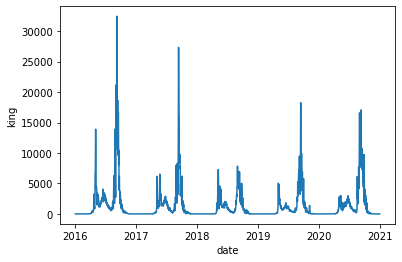

In [188]:
sns.lineplot(
    data=king_test,
    x="date", y="king"
)

In [189]:
model, test_preds = create_single_layer_rnn_model(x_train, y_train, x_test)

Epoch 1/1000
352/352 [==============================] - 3s 8ms/step - loss: 13214212.1076
Epoch 2/1000
352/352 [==============================] - 3s 7ms/step - loss: 13722240.4348
Epoch 3/1000
352/352 [==============================] - 3s 7ms/step - loss: 12949472.6700
Epoch 4/1000
352/352 [==============================] - 2s 7ms/step - loss: 11960407.6006
Epoch 5/1000
352/352 [==============================] - 3s 7ms/step - loss: 12385053.2054
Epoch 6/1000
352/352 [==============================] - 2s 7ms/step - loss: 12888403.8059
Epoch 7/1000
352/352 [==============================] - 3s 8ms/step - loss: 12186904.7890
Epoch 8/1000
352/352 [==============================] - 3s 7ms/step - loss: 12837266.5156
Epoch 9/1000
352/352 [==============================] - 2s 7ms/step - loss: 12673488.9306
Epoch 10/1000
352/352 [==============================] - 3s 7ms/step - loss: 12985934.8782
Epoch 11/1000
352/352 [==============================] - 2s 7ms/step - loss: 13061399.4504
Epoch 12

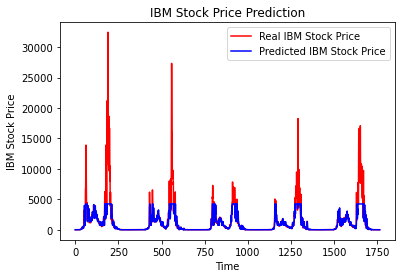

In [190]:
plot_predictions(y_test, test_preds)

In [191]:
accuracy = accuracy_score(y_test, np.round(test_preds.reshape(test_preds.shape[0])))

In [192]:
accuracy

0.007936507936507936